<a href="https://colab.research.google.com/github/KodumuruRaja/Feature-Engineering/blob/main/Feature-Engineering-(All%20Outlier-Detection%20%26%20Removal%20Techniques).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/heights.csv")

In [ ]:
df.head()

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [ ]:
df['height']

0      1.2
1      2.3
2      4.9
3      5.1
4      5.2
5      5.4
6      5.5
7      5.5
8      5.6
9      5.6
10     5.8
11     5.9
12     6.0
13     6.1
14     6.2
15     6.5
16     7.1
17    14.5
18    23.2
19    40.2
Name: height, dtype: float64

# **1) Outlier detection and removal using Percentile**

In [ ]:
max_threshold=df['height'].quantile(0.95)

In [ ]:
max_threshold

24.05000000000001

In [ ]:
df[df['height']>max_threshold]

,name,height
19,Liu,40.2


In [ ]:
min_threshold=df['height'].quantile(0.05)

In [ ]:
min_threshold

2.245

In [ ]:
df[df['height']<min_threshold]

,name,height
0,mohan,1.2


In [ ]:
# removing outliers using percentiles(quantiles)
df[(df['height']<max_threshold)&(df['height']>min_threshold)]

,name,height
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8


# **For larger datasets Percentile working**

In [ ]:
df=pd.read_csv("/content/bhp.csv")

In [ ]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
df.shape

(13200, 7)

In [ ]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
min_threshold,max_threshold=df.price_per_sqft.quantile([0.001,0.999])

In [ ]:
min_threshold,max_threshold

(1366.184, 50959.36200000099)

In [ ]:
df[df['price_per_sqft']<min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [ ]:
df[df['price_per_sqft']>max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [ ]:
df2=df[(df['price_per_sqft']<max_threshold)&(df['price_per_sqft']>min_threshold)]

In [ ]:
df2.shape

(13172, 7)

In [ ]:
df2.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


# **2) Outlier Detection and removal using 3 StandardDeviation**
# One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [ ]:
df=pd.read_csv("/content/weight-height.csv")

In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


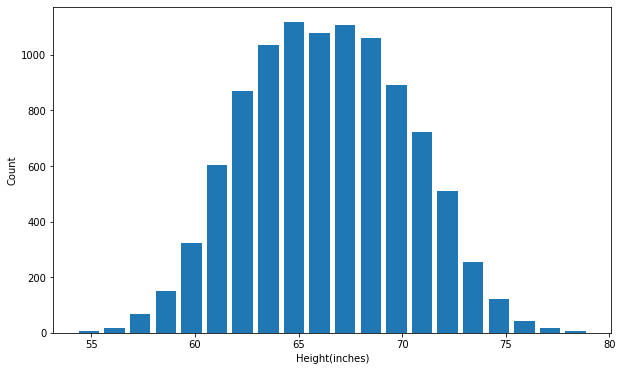

In [ ]:
plt.hist(df.Height,bins=20,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

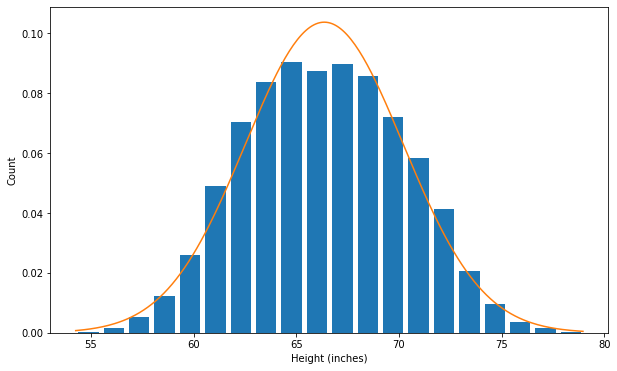

In [ ]:
from scipy.stats import norm
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [ ]:
df.Height.mean()

66.36755975482106

In [ ]:
df.Height.std()

3.847528120773233

In [ ]:
# 3 standardDeviation
upper_limit=df.Height.mean()+3*df.Height.std()
upper_limit

77.91014411714076

In [ ]:
lower_limit=df.Height.mean()-3*df.Height.std()
lower_limit

54.82497539250136

In [ ]:
# Outliers are
df[(df.Height>upper_limit)|(df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [ ]:
# data after removing Outliers
data=df[(df.Height<upper_limit)&(df.Height>lower_limit)]

In [ ]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
data.shape

(9993, 3)

# **3)Outlier Detection and removal using Z-Score**
# Z score indicates how many standard deviation away a data point is.
# For example in our case mean is 66.37 and standard deviation is 3.84.
# If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

In [ ]:
df['zscore']=(df.Height-df.Height.mean())/df.Height.std()
df.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


# Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away (Outliers)

In [ ]:
df[df['zscore']>3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [ ]:
df[df['zscore']<-3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [ ]:
# List of all Outliers
df[(df.zscore<-3)|(df.zscore>3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [ ]:
# Dataset without Outliers
data=df[(df.zscore>-3)&(df.zscore<3)]
data.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [ ]:
data.shape

(9993, 4)

In [ ]:
# Total number of outliers removed is
df.shape[0]-data.shape[0]

7

# **4)Outlier detection using IQR**

In [ ]:
df=pd.read_csv("/content/heights.csv")

In [ ]:
df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [ ]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


In [ ]:
Q1=df.height.quantile(0.25)
Q3=df.height.quantile(0.75)

In [ ]:
Q1,Q3

(5.3500000000000005, 6.275)

In [ ]:
IQR=Q3-Q1

In [ ]:
IQR

0.9249999999999998

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.962500000000001, 7.6625)

In [ ]:
# Outliers are
df[(df.height>upper_limit)|(df.height<lower_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [ ]:
# removing outliers
data1=df[(df.height<upper_limit)&(df.height>lower_limit)]

In [ ]:
data1

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


# **5) Treating Outliers as Missing Values**

In [ ]:
df=pd.read_csv("/content/heights.csv")

In [ ]:
df.head()

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [ ]:
df.mean()

height    8.39
dtype: float64

# **Find Outliers using any of the processes Percentile, StandardDeviation, Z-Score, IQR**

In [ ]:
Q1=df.height.quantile(0.25)
Q3=df.height.quantile(0.75)
Q1,Q3

(5.3500000000000005, 6.275)

In [ ]:
IQR=Q3-Q1
IQR

0.9249999999999998

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.962500000000001, 7.6625)

In [ ]:
# Outliers are
dt=df[(df.height>upper_limit)|(df.height<lower_limit)]
dt

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [ ]:
# Outliers (height) values are replaced with 0
dt['height']=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dt

,name,height
0,mohan,0
1,maria,0
17,aamir,0
18,ken,0
19,Liu,0


In [ ]:
dt['height']=data1.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dt

,name,height
0,mohan,NaN
1,maria,NaN
17,aamir,NaN
18,ken,NaN
19,Liu,NaN


In [ ]:
# data without outliers
data1=df[(df.height<upper_limit)&(df.height>lower_limit)]
data1

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


In [ ]:
data1.mean()

height    5.76
dtype: float64

In [ ]:
# New Orginal dataset is formed along with modified outliers as missing (0) data
dqt=data1.append(dt,ignore_index=True)

In [ ]:
dqt

,name,height
0,sakib,4.9
1,tao,5.1
2,virat,5.2
3,khusbu,5.4
4,dmitry,5.5
5,selena,5.5
6,john,5.6
7,imran,5.6
8,jose,5.8
9,deepika,5.9


# **Now these missing data (Outliers as height(0)) are replaced by Mean/Median/Mode, Random Sample Imputation, Replacement by Arbitary value, End of Distribution Imputation, Frequent Categories Imputation, replacing with new feature (or) any of the Missing Data Imputation**

In [ ]:
dqt.isnull().sum()

name      0
height    5
dtype: int64

In [ ]:
dqt['height'].fillna(data1['height'].mean(),inplace=True)

In [ ]:
dqt

,name,height
0,sakib,4.90
1,tao,5.10
2,virat,5.20
3,khusbu,5.40
4,dmitry,5.50
5,selena,5.50
6,john,5.60
7,imran,5.60
8,jose,5.80
9,deepika,5.90


{'boxes': [<matplotlib.lines.Line2D at 0x7f04567504e0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0456750ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f04566dd9b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f04566dd630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f04567507f0>,
  <matplotlib.lines.Line2D at 0x7f0456750b70>]}

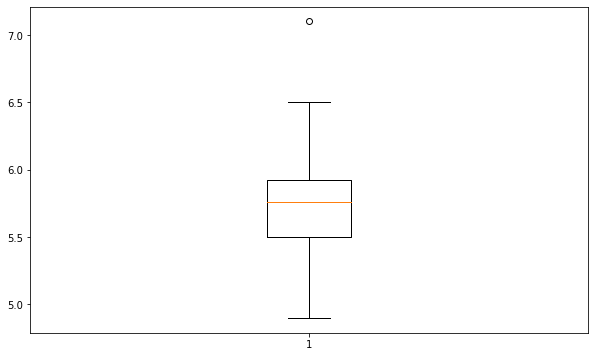

In [ ]:
plt.boxplot(dqt['height'])